In [112]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import PIL
import re
import time

from sklearn.neighbors import BallTree

In [10]:
def read_feat_log(log_file):
    log_handle = open(log_file, 'r')
    reader = csv.reader(log_handle)
    reader.next()

    values = []
    for (num_row, row) in enumerate(reader):
        (key, label, feat) = (
            row[0],
            int(row[1]),
            np.fromstring(re.sub('[\[\]]', '', row[2].replace('\n', '')), sep=' '))
        values.append((key, label, feat))
    log_handle.close()

    (keys, labels, feats) = [np.stack(value, axis=0) for value in zip(*values)]
    return (keys, labels, feats)

In [111]:
(train_keys, train_labels, train_feats) = read_feat_log('/mnt/data/Foods/train_feat_log.csv')
(test_keys, test_labels, test_feats) = read_feat_log('/mnt/data/Foods/test_feat_log.csv')

In [114]:
start_time = time.time()
tree = BallTree(train_feats)
print('Build time: %.2fs' % (time.time() - start_time))

Build time: 23.39s


In [145]:
NUM_QUERIES = 32
TOP_K = 4

In [148]:
test_sel = np.random.random_integers(test_keys.size, size=(NUM_QUERIES,))

start_time = time.time()
(dist, ind) = tree.query(test_feats[test_sel], k=TOP_K)
print('Query time per example: %.2fs' % ((time.time() - start_time) / NUM_QUERIES))

keys = np.concatenate([
    test_keys[test_sel][:, None],
    train_keys[ind]], axis=1)

titles = np.concatenate([
    np.reshape(['Query' for _ in xrange(NUM_QUERIES)], (NUM_QUERIES, 1)),
    np.reshape(['dist=%.1f' % d for d in np.nditer(dist)], dist.shape)], axis=1)

Query time per example: 0.16s


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 248 + 1) instead
  if __name__ == '__main__':


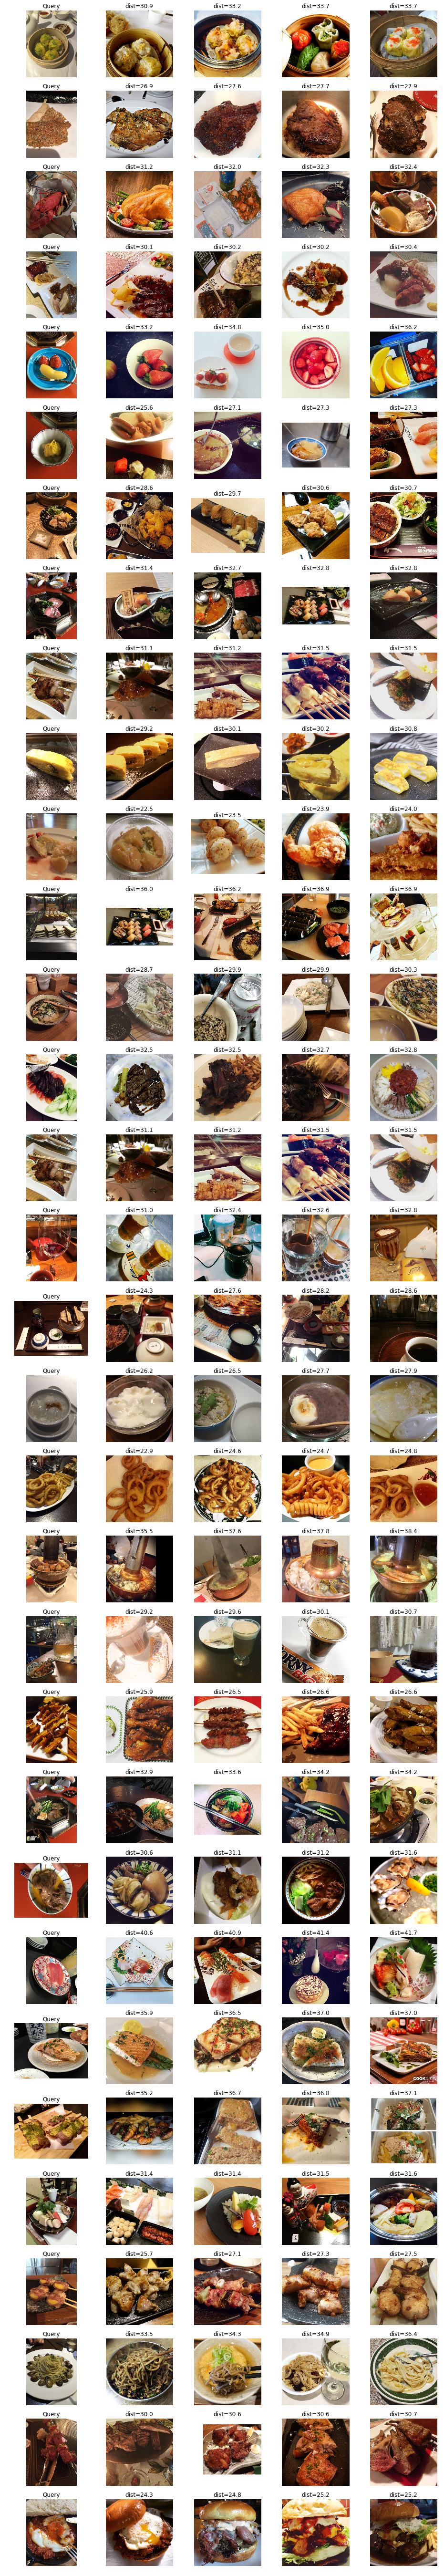

In [151]:
(fig, axs) = plt.subplots(
    nrows=keys.shape[0],
    ncols=keys.shape[1], 
    squeeze=False, 
    figsize=(16, 96))

for (ax, key, title) in np.nditer([axs, keys, titles], ['refs_ok']):
    image = PIL.Image.open(key.item())
    ax.item().imshow(np.asarray(image))
    ax.item().set_title(title.item())
    ax.item().axis('off')